# Vol

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib as mpl
import pandas as pd
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import pandas_datareader.data as web
from datetime import datetime
import scipy.stats as scs
import statsmodels.api as sm
import scipy.optimize as sco
import scipy.interpolate as sci

Using TensorFlow backend.


In [2]:
##remote
#df = web.get_data_yahoo('^vix',start=datetime(1984, 1, 1))
#df = df.iloc[::-1]
#df.tail()

In [3]:
sym = ['pfe','mrk','nvs','gsk','sny']
df_dict ={}
for x in sym:
    df_dict[x] = web.get_data_yahoo(x,start=datetime(1970, 1, 1))["Adj Close"]
data = pd.DataFrame(df_dict)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12583 entries, 1970-01-02 to 2019-11-15
Data columns (total 5 columns):
pfe    11971 non-null float64
mrk    12583 non-null float64
nvs    5795 non-null float64
gsk    9996 non-null float64
sny    4377 non-null float64
dtypes: float64(5)
memory usage: 589.8 KB


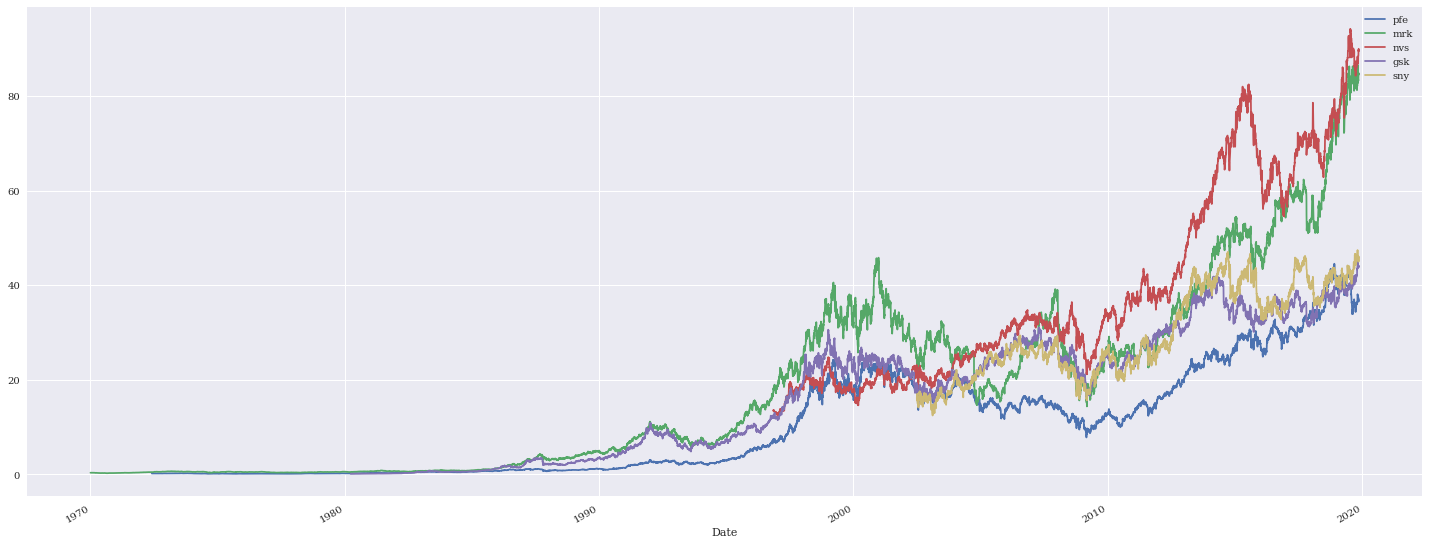

In [4]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
data.info()
data.plot(figsize=(25, 10))

In [5]:
#basket 

#cnt = np.arange(len(tick))
#sym
#for s in sym:
#    df_dict[s] = pd.DataFrame()[]
#    df_dict[s] = web.get_data_yahoo(s,start=datetime(1970, 1, 1)).iloc[::-1]

In [6]:
 data.describe().round(2)

,pfe,mrk,nvs,gsk,sny
count,11971.00,12583.00,5795.00,9996.00,4377.00
mean,10.32,18.05,38.88,17.33,29.85
std,11.07,19.49,20.95,12.97,9.31
min,0.11,0.24,12.37,0.10,12.47
25%,0.53,0.72,21.14,3.46,22.53
50%,5.35,9.86,31.66,19.73,26.88
75%,17.70,29.46,57.66,27.38,39.48
max,44.57,86.66,94.26,45.30,47.46


In [7]:
data.diff().tail()

,pfe,mrk,nvs,gsk,sny
Date,,,,,
2019-11-11,-0.119999,-0.309998,0.259995,-0.158249,0.000000
2019-11-12,0.040001,0.840004,0.660004,0.257156,0.189999
2019-11-13,-0.370003,0.699997,0.570000,0.138466,-0.430000
2019-11-14,-0.049999,-0.269997,-0.349998,-0.321003,-0.599998
2019-11-15,0.730000,0.349998,0.529999,0.240002,1.090000


In [8]:
data.pct_change().describe()

,pfe,mrk,nvs,gsk,sny
count,11970.000000,12582.000000,5794.000000,9995.000000,4376.000000
mean,0.000586,0.000563,0.000419,0.000735,0.000383
std,0.017302,0.016026,0.013514,0.017245,0.017022
min,-0.172996,-0.267806,-0.080321,-0.219654,-0.110197
25%,-0.008959,-0.007809,-0.006825,-0.008399,-0.008419
50%,0.000000,0.000000,0.000356,0.000000,0.000323
75%,0.009983,0.008891,0.007469,0.009352,0.009236
max,0.102439,0.130329,0.105815,0.166086,0.154851


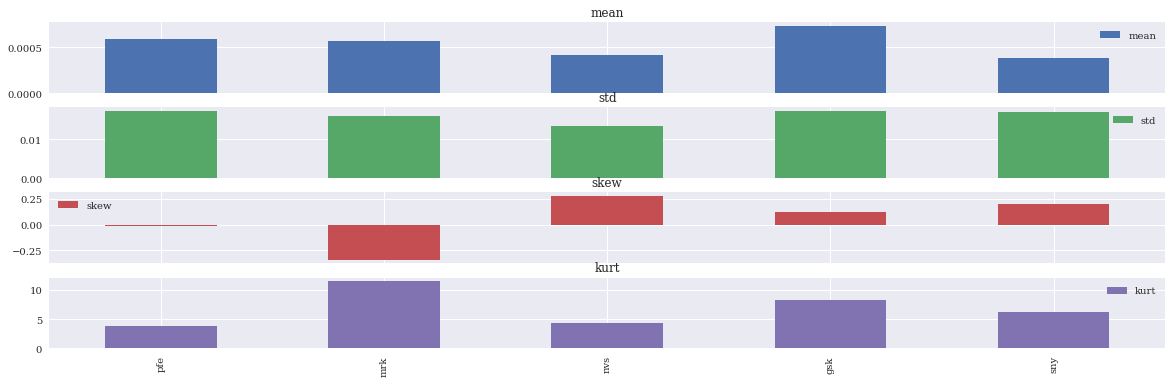

,mean,std,skew,kurt
pfe,0.000586,0.017302,-0.010324,3.791000
mrk,0.000563,0.016026,-0.347010,11.508760
nvs,0.000419,0.013514,0.281023,4.257291
gsk,0.000735,0.017245,0.121775,8.236869
sny,0.000383,0.017022,0.199320,6.280993


In [9]:
mean = data.pct_change().mean()
std =data.pct_change().std()
skew = data.pct_change().skew()
kurt = data.pct_change().kurt()
stats = pd.concat([mean, std, skew, kurt], axis=1)
stats.columns = ['mean',"std","skew","kurt"]
stats.plot(kind='bar',figsize=(20,6),subplots=True)
plt.show()
stats

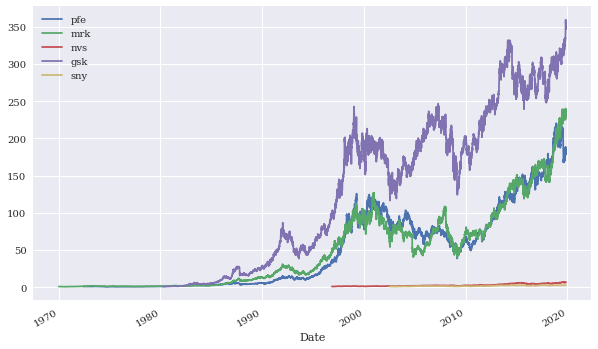

In [10]:
rets = np.log(data / data.shift(1))
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

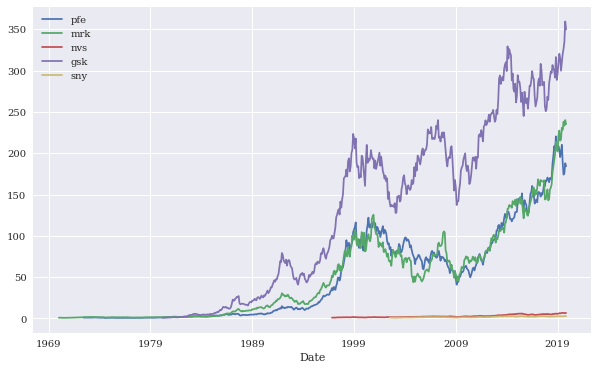

In [11]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6));

In [12]:
data2 = data.dropna()
rollingstats = pd.DataFrame()
window = 20
for x in sym:
    rollingstats[x+' '+'min'] = data2[x].rolling(window=window).min()
    rollingstats[x+' '+'mean'] = data2[x].rolling(window=window).mean()
    rollingstats[x+' '+'std'] = data2[x].rolling(window=window).std()
    rollingstats[x+' '+'median'] = data2[x].rolling(window=window).median()
    rollingstats[x+' '+'max'] = data2[x].rolling(window=window).max()
    rollingstats[x+' '+'ewm'] = data2[x].ewm(halflife=0.5, min_periods=window).mean()
rollingstats

,pfe min,pfe mean,pfe std,pfe median,pfe max,pfe ewm,mrk min,mrk mean,mrk std,mrk median,...,gsk std,gsk median,gsk max,gsk ewm,sny min,sny mean,sny std,sny median,sny max,sny ewm
Date,,,,,,,,,,,,,,,,,,,,,
2002-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[None, None, None, None, None]

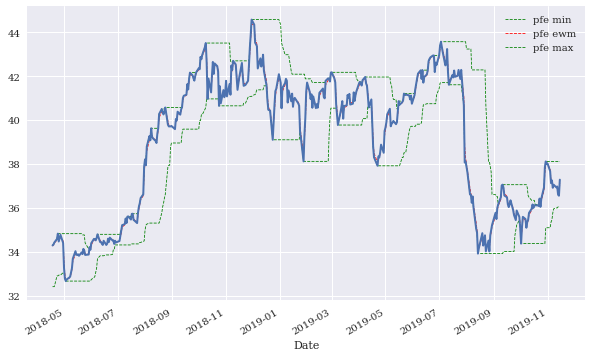

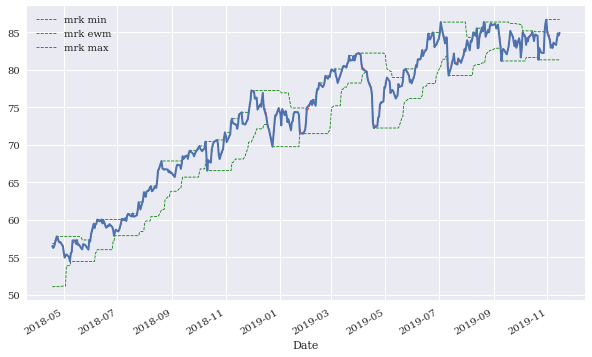

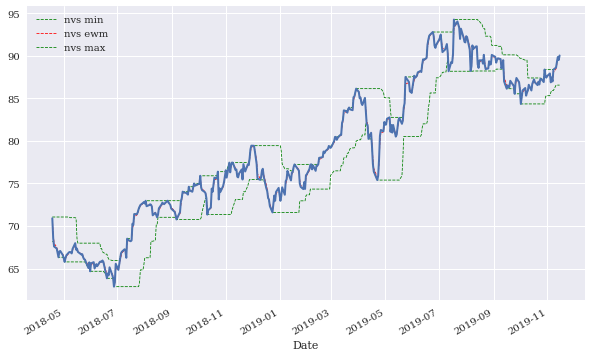

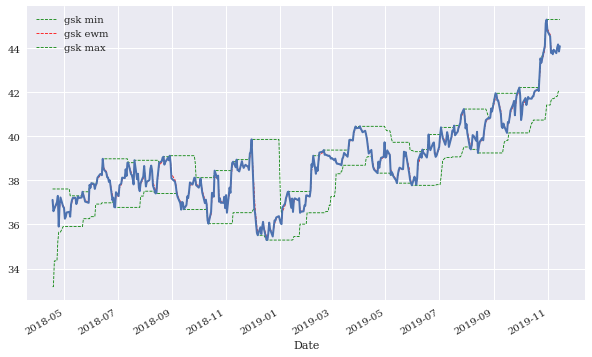

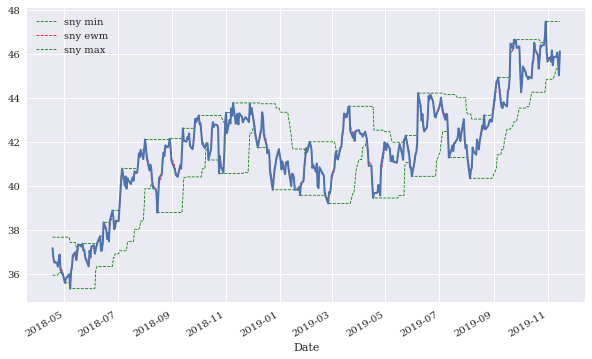

In [13]:
def roller(tick):
    ax = rollingstats[[tick+' min', tick+' ewm', tick+' max']].iloc[-400:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
    data[tick].iloc[-400:].plot(ax=ax, lw=2.0);
list(map(roller, sym))

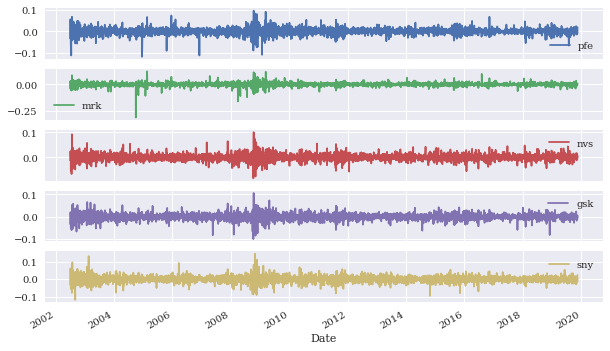

In [14]:
rets = np.log(data / data.shift(1))
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6));

In [15]:
def corr(tick):
    tmp= ['spy']
    tmp.append(tick)
    df_dict ={}
    for x in tmp:
        df_dict[x] = web.get_data_yahoo(x,start=datetime(1970, 1, 1))["Adj Close"]
    data = pd.DataFrame(df_dict)
    rets = np.log(data / data.shift(1))
    rets.dropna(inplace=True)
    return rets

def corrg(tick):
    pd.plotting.scatter_matrix(corr(tick),alpha=0.2,diagonal='hist', figsize=(10, 6));

def corrgraph(tick):
    rets= corr(tick)
    ax = rets['spy'].rolling(window=252).corr(rets[tick]).plot(figsize=(10, 6))
    ax.axhline(rets.corr().iloc[0, 1], c='r')

corr_all = list(map(corr,sym))

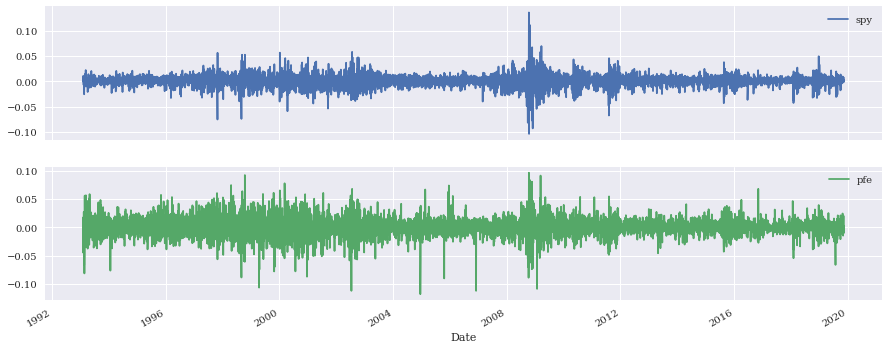

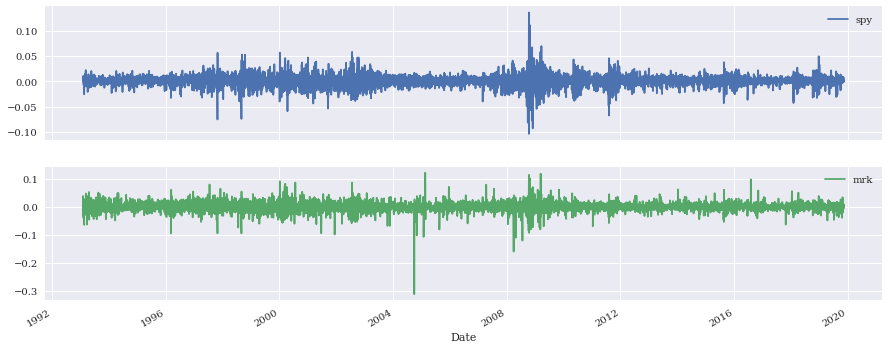

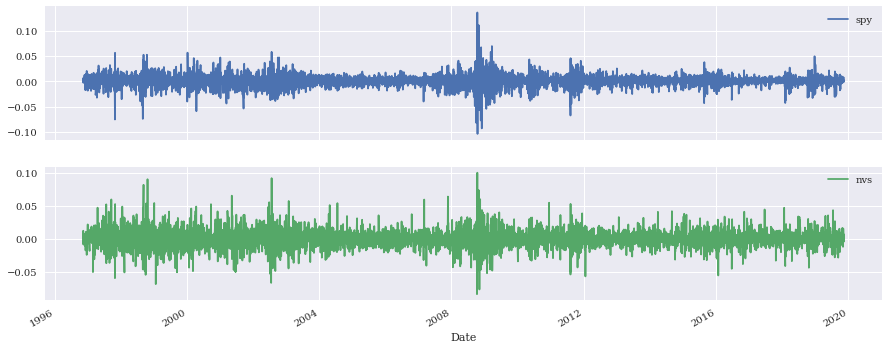

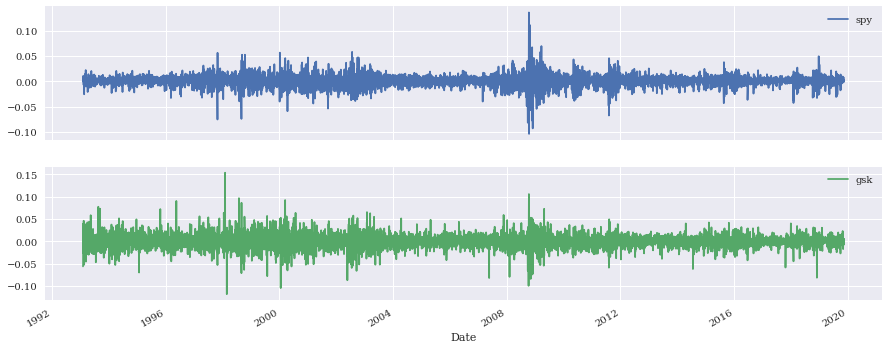

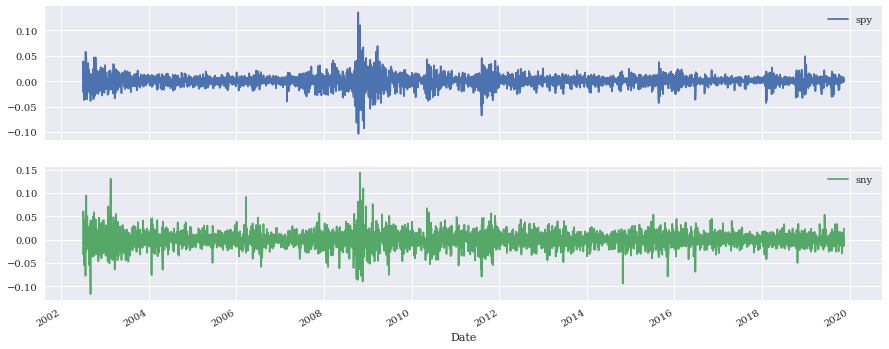

In [16]:
for i in range(len(sym)):
    corr_all[i].plot(subplots=True, figsize=(15, 6));

In [17]:
#ols
#reg = np.polyfit(rets['spy'], rets['pfe'], deg=1)
#ax = rets.plot(kind='scatter', x='spy', y='pfe', figsize=(10, 6))
#ax.plot(rets['spy'], np.polyval(reg, rets['spy']), 'r', lw=2);

In [18]:
#time for statistics
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4377 entries, 2002-07-01 to 2019-11-15
Data columns (total 5 columns):
pfe    4377 non-null float64
mrk    4377 non-null float64
nvs    4377 non-null float64
gsk    4377 non-null float64
sny    4377 non-null float64
dtypes: float64(5)
memory usage: 205.2 KB


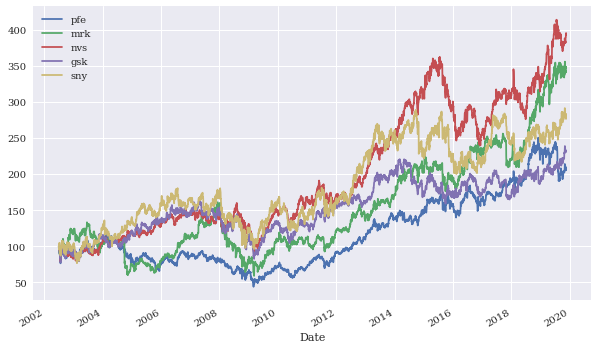

In [19]:
(data / data.iloc[0] * 100).plot(figsize=(10, 6))

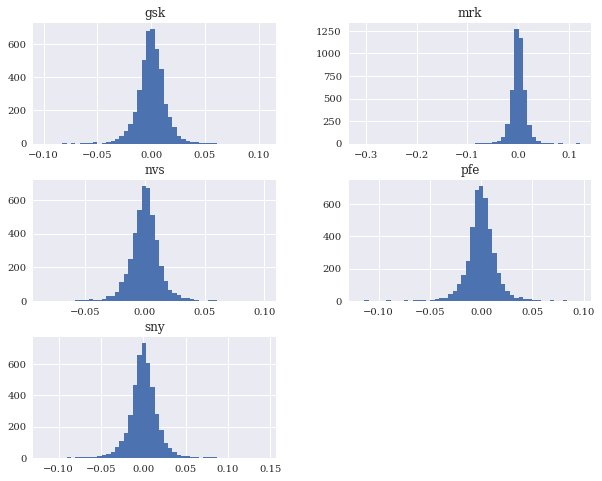

In [20]:
log_returns = np.log(data / data.shift(1))
log_returns.head()
log_returns.hist(bins=50, figsize=(10, 8));


In [21]:
def print_statistics(array):
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

    
def normality_tests(arr):
    print('Skew of data set  %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set  %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])


In [22]:
for s in sym:
    print('\nResults for symbol {}'.format(s))
    print(32 * '-')
    log_data = np.array(log_returns[s].dropna())
    print_statistics(log_data)


Results for symbol pfe
--------------------------------
     statistic           value
------------------------------
          size      4376.00000
           min        -0.11817
           max         0.09687
          mean         0.00017
           std         0.01441
          skew        -0.33252
      kurtosis         7.35383

Results for symbol mrk
--------------------------------
     statistic           value
------------------------------
          size      4376.00000
           min        -0.31171
           max         0.12251
          mean         0.00029
           std         0.01651
          skew        -1.82380
      kurtosis        37.49393

Results for symbol nvs
--------------------------------
     statistic           value
------------------------------
          size      4376.00000
           min        -0.08373
           max         0.10058
          mean         0.00031
           std         0.01243
          skew         0.08509
      kurtosis         

In [23]:
for s in sym:
    print('\nResults for symbol {}'.format(s))
    print(32 * '-')
    log_data = np.array(log_returns[s].dropna())
    normality_tests(log_data)


Results for symbol pfe
--------------------------------
Skew of data set          -0.333
Skew test p-value          0.000
Kurt of data set           7.354
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol mrk
--------------------------------
Skew of data set          -1.824
Skew test p-value          0.000
Kurt of data set          37.494
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol nvs
--------------------------------
Skew of data set           0.085
Skew test p-value          0.022
Kurt of data set           4.981
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol gsk
--------------------------------
Skew of data set          -0.284
Skew test p-value          0.000
Kurt of data set           5.230
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol sny
--------------------------------
Skew of data set          -0.003
Skew test p-value     

In [24]:
noa = len(sym)
rets = np.log(data / data.shift(1))
rets.cov() * 252 

,pfe,mrk,nvs,gsk,sny
pfe,0.052315,0.033733,0.022018,0.024452,0.029302
mrk,0.033733,0.068682,0.021927,0.024991,0.029453
nvs,0.022018,0.021927,0.038957,0.024074,0.029873
gsk,0.024452,0.024991,0.024074,0.046042,0.032822
sny,0.029302,0.029453,0.029873,0.032822,0.072882


In [25]:
from math import sqrt
weights = np.random.random(noa)  
weights /= np.sum(weights)
weights = np.random.random(noa)  

#E[X]--np.sum(rets.mean() * weights) * 252
#var--np.dot(weights.T, np.dot(rets.cov() * 252, weights))
#vol--sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
def port_ret(weights):
             return np.sum(rets.mean() * weights) * 252
def port_vol(weights):
             return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [26]:
prets = []
pvols = []
for p in range (5000):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

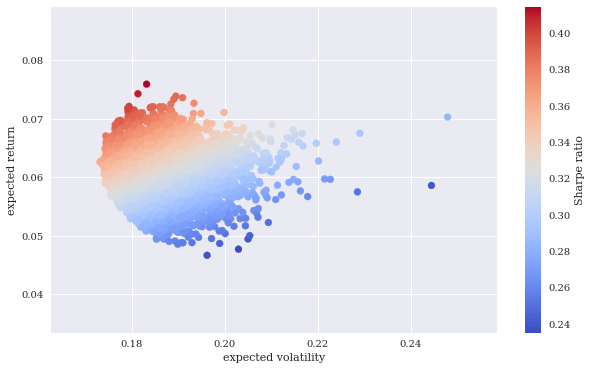

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

In [28]:
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
eweights = np.array(noa * [1. / noa,])
min_func_sharpe(eweights)
opts = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons)
optv = sco.minimize(port_vol, eweights,method='SLSQP', bounds=bnds,constraints=cons)

In [29]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret}, {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)
trets = np.linspace(0.05, 0.2, 50)
tvols = []

for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

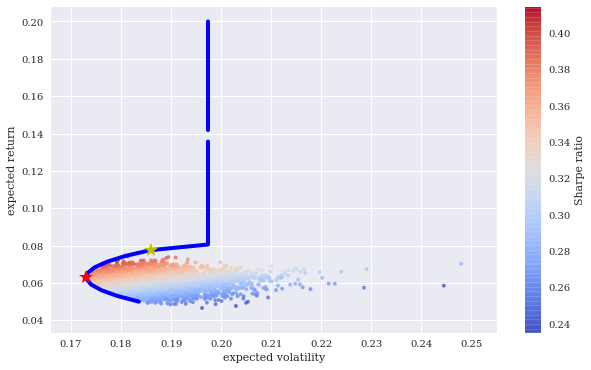

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')


In [2]:
def bayes(tick):
    tmp= ['spy']
    tmp.append(tick)
    df_dict ={}
    for x in tmp:
        df_dict[x] = web.get_data_yahoo(x,start=datetime(1970, 1, 1))["Adj Close"]
    data = pd.DataFrame(df_dict)
    data=data.dropna()
    data = data / data.iloc[0] #normalize to 1
    return data
data = bayes('pfe')
data.iloc[-1] / data.iloc[0] - 1
data.corr()

,spy,pfe
spy,1.000000,0.917285
pfe,0.917285,1.000000


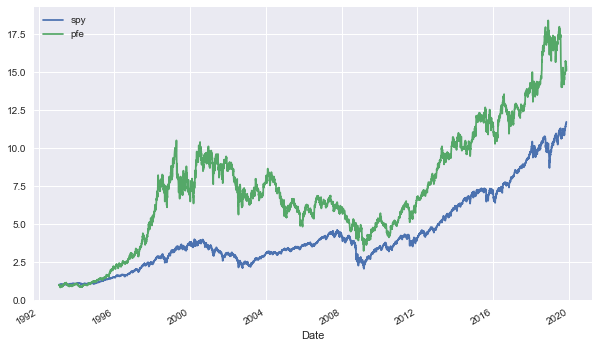

In [3]:
data.plot(figsize=(10,6))

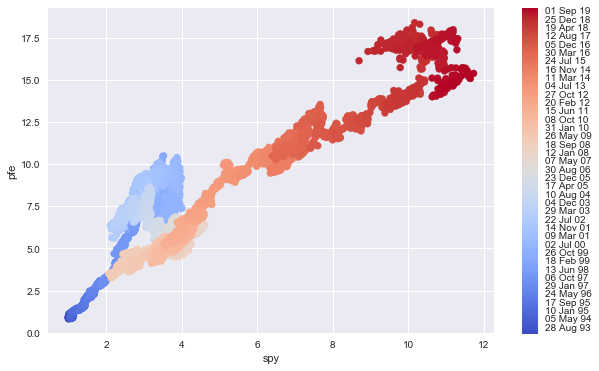

In [4]:
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
plt.figure(figsize=(10, 6))
plt.scatter(data['spy'], data['pfe'], c=mpl_dates, marker='o', cmap='coolwarm')
plt.xlabel('spy')
plt.ylabel('pfe')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),format=mpl.dates.DateFormatter('%d %b %y'));

In [6]:
import pymc3 as pm
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    y_est = alpha + beta * data['spy'].values
    likelihood = pm.Normal('pfe', mu=y_est, sd=sigma, observed=data['pfe'].values)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(250, tune=2000, start=start,progressbar=True)


ModuleNotFoundError: No module named 'pymc3'

In [ ]:
pm.summary(trace)

In [ ]:
df2 = df.copy()
df2["Adj Open"] = (df2["Adj Close"]/df2["Close"] * df2["Open"])
df2["Adj High"] = (df2["Adj Close"]/df2["Close"] * df2["High"])
df2["Adj Low"] = (df2["Adj Close"]/df2["Close"] * df2["Low"])
df2["Log HO"] = np.log(df2["Adj High"]/df2["Adj Open"])
df2["Log LO"] = np.log(df2["Adj Low"]/df2["Adj Open"])
df2["Log CO"] = np.log(df2["Adj Close"]/df2["Adj Open"])
df2["Log OC"] = np.log(df2["Adj Open"]/df2.shift(-1)["Adj Close"])
df2["Log OC^2"] = df2["Log OC"]**2
df2["Log CC"] = np.log(df2["Close"]/df2.shift(-1)["Close"])
df2["RS"] = (df2["Log HO"]*(df2["Log HO"]- df2["Log CO"])) + (df2["Log LO"]*(df2["Log LO"]- df2["Log CO"]))
df2["LogCCC"] = df2["Log CC"]**2
df2["Log HL"] = np.log(df2["Adj High"]/df2["Adj Low"])
df2.head()

In [ ]:
#yz
yz = pd.DataFrame(df2.iloc[:,0].copy())
del yz["High"]
yz["30 day vol close"] = (1/29 )* df2["LogCCC"].rolling(window = 30).sum()
yz["30 day vol close"] = yz.shift(-29)["30 day vol close"]
yz["30 day vol open"] = (1/29 )* df2["Log OC^2"].rolling(window = 30).sum()
yz["30 day vol open"] = yz.shift(-29)["30 day vol open"]
yz["30 day vol RS"] = (1/29 )* df2["RS"].rolling(window = 30).sum()
yz["30 day vol RS"] = yz.shift(-29)["30 day vol RS"]
tmp = yz["30 day vol RS"].last_valid_index()
yz.loc[tmp,"30 day vol RS"] = np.NaN
yz["30 Day Yang Zhang"] = np.sqrt(252)*np.sqrt(yz["30 day vol open"] + 0.164333* yz["30 day vol close"]+ yz["30 day vol RS"]*0.835667)


yz["60 day vol close"] = (1/59 )* df2["LogCCC"].rolling(window = 60).sum()
yz["60 day vol close"] = yz.shift(-59)["60 day vol close"]
yz["60 day vol open"] = (1/59 )* df2["Log OC^2"].rolling(window = 60).sum()
yz["60 day vol open"] = yz.shift(-59)["60 day vol open"]
yz["60 day vol RS"] = (1/59 )* df2["RS"].rolling(window = 60).sum()
yz["60 day vol RS"] = yz.shift(-59)["60 day vol RS"]
yz["60 Day Yang Zhang"] = np.sqrt(252)*np.sqrt(yz["60 day vol open"] + 0.167167* yz["60 day vol close"]+ yz["60 day vol RS"]*0.832833)


yz["90 day vol close"] = (1/89 )* df2["LogCCC"].rolling(window = 90).sum()
yz["90 day vol close"] = yz.shift(-89)["90 day vol close"]
yz["90 day vol open"] = (1/89 )* df2["Log OC^2"].rolling(window = 90).sum()
yz["90 day vol open"] = yz.shift(-89)["90 day vol open"]
yz["90 day vol RS"] = (1/89 )* df2["RS"].rolling(window = 90).sum()
yz["90 day vol RS"] = yz.shift(-89)["90 day vol RS"]
yz["90 Day Yang Zhang"] = np.sqrt(252)*np.sqrt(yz["90 day vol open"] + 0.168111* yz["90 day vol close"]+ yz["90 day vol RS"]*0.831889)


yz["120 day vol close"] = (1/119 )* df2["LogCCC"].rolling(window = 120).sum()
yz["120 day vol close"] = yz.shift(-119)["120 day vol close"]
yz["120 day vol open"] = (1/119 )* df2["Log OC^2"].rolling(window = 120).sum()
yz["120 day vol open"] = yz.shift(-119)["120 day vol open"]
yz["120 day vol RS"] = (1/119 )* df2["RS"].rolling(window = 120).sum()
yz["120 day vol RS"] = yz.shift(-119)["120 day vol RS"]
yz["120 Day Yang Zhang"] = np.sqrt(252)*np.sqrt(yz["120 day vol open"] + 0.168583* yz["120 day vol close"]+ yz["120 day vol RS"]*0.831417)
yz.head()

In [ ]:
#Parkinson
pk = pd.DataFrame(df2.iloc[:,0].copy())
del pk["High"]
pk["temp"]= (1/(4*np.log(2)))*np.log(df2["Adj High"]/df2["Adj Low"])**2
pk["30 day vol"] =  np.sqrt(252* pk["temp"].rolling(window = 30).mean()).shift(-29)
pk["60 day vol"] =  np.sqrt(252* pk["temp"].rolling(window = 60).mean()).shift(-59)
pk["90 day vol"] =  np.sqrt(252* pk["temp"].rolling(window = 90).mean()).shift(-89)
pk["120 day vol"] =  np.sqrt(252* pk["temp"].rolling(window = 120).mean()).shift(-119)
pk.head()

In [ ]:
#Garman-Klass
gk = pd.DataFrame(df2.iloc[:,0].copy())
del gk["High"]
gk["temp"]= (df2["Log OC"]**2 + 0.5*df2["Log HL"]**2 - 0.3862*df2["Log CO"]**2)
gk["30 day vol"] =   np.sqrt(252* gk["temp"].rolling(window = 30).mean()).shift(-29)
gk["60 day vol"] =  np.sqrt(252* gk["temp"].rolling(window = 60).mean()).shift(-59)
gk["90 day vol"] =  np.sqrt(252* gk["temp"].rolling(window = 90).mean()).shift(-89)
gk["120 day vol"] =  np.sqrt(252* gk["temp"].rolling(window = 120).mean()).shift(-119)
gk.head()

In [ ]:
#Rogers Satchell
rs = pd.DataFrame(df2.iloc[:,0].copy())
del rs["High"]
rs["temp"]= (df2["RS"])
rs["30 day vol"] =  np.sqrt(252* rs["temp"].rolling(window = 30).mean()).shift(-29)
rs["60 day vol"] =  np.sqrt(252* rs["temp"].rolling(window = 60).mean()).shift(-59)
rs["90 day vol"] =  np.sqrt(252* rs["temp"].rolling(window = 90).mean()).shift(-89)
rs["120 day vol"] =  np.sqrt(252* rs["temp"].rolling(window = 120).mean()).shift(-119)
rs.head()

In [ ]:
# Hodge Tompkins
ht = pd.DataFrame(df2.iloc[:,0].copy())
del ht["High"]
ht["log return"] = np.log(df2["Adj Close"]/df2["Adj Close"].shift(-1))
ht["30 day vol tmp"] =  np.sqrt(252)* ((ht["log return"].rolling(window = 30).std()).shift(-29))
ht["60 day vol tmp"] =  np.sqrt(252)* ((ht["log return"].rolling(window = 60).std()).shift(-59))
ht["90 day vol tmp"] =  np.sqrt(252)* ((ht["log return"].rolling(window = 90).std()).shift(-89))
ht["120 day vol tmp"] =  np.sqrt(252)*(( ht["log return"].rolling(window = 120).std()).shift(-119))
one_month = np.sqrt(1/(1 - (30/(ht["log return"].count()-29)) + ((30**2-1)/(3*(ht["log return"].count()-29)**2))))
two_month = np.sqrt(1/(1 - (60/(ht["log return"].count()-59)) + ((60**2-1)/(3*(ht["log return"].count()-59)**2))))
three_month = np.sqrt(1/(1 - (90/(ht["log return"].count()-89)) + ((90**2-1)/(3*(ht["log return"].count()-89)**2))))
four_month = np.sqrt(1/(1 - (120/(ht["log return"].count()-119)) + ((120**2-1)/(3*(ht["log return"].count()-119)**2))))
ht["30 day vol"] = ht["30 day vol tmp"]* one_month
ht["60 day vol"] = ht["60 day vol tmp"]* two_month
ht["90 day vol"] = ht["90 day vol tmp"]* three_month
ht["120 day vol"] = ht["120 day vol tmp"]* four_month 
ht.head()



In [ ]:
#garch
import warnings
warnings.simplefilter('ignore')

gh = pd.DataFrame(df2.iloc[:,0].copy())
del gh["High"]
gh["log return"] = np.log(df2["Adj Close"]/df2["Adj Close"].shift(-1))
returns = gh['log return'][::-1][1:]
returns

from arch import arch_model
am = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
res = am.fit(update_freq=5)
print(res.summary())
fig = res.plot(annualize='D')

In [ ]:
res.params
gh['vol'] =np.sqrt(252) * (np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + res.conditional_volatility**2 * res.params['beta[1]']))
garch = gh.copy()
garch = garch[['vol']]
garch.head()

In [ ]:
ht_cones = ht.copy()
ht_cones = ht_cones[["30 day vol","60 day vol","90 day vol","120 day vol"]]

In [ ]:
ht_maxi =ht_cones.quantile(1)
ht_quartile_3 =ht_cones.quantile(.75)
ht_median = ht_cones.quantile()
ht_quartile_1 =ht_cones.quantile(.25)
ht_mini =ht_cones.quantile(0)
ht_report = pd.DataFrame([ht_maxi, ht_quartile_3, ht_median, ht_quartile_1, ht_mini], index=["Max","Q3","Median","Q2","Min"])
ht_report

In [ ]:
rs_cones = rs.copy()
rs_cones = rs_cones[["30 day vol","60 day vol","90 day vol","120 day vol"]]

In [ ]:
rs_maxi =rs_cones.quantile(1)
rs_quartile_3 =rs_cones.quantile(.75)
rs_median = rs_cones.quantile()
rs_quartile_1 =rs_cones.quantile(.25)
rs_mini =rs_cones.quantile(0)
rs_report = pd.DataFrame([rs_maxi, rs_quartile_3, rs_median, rs_quartile_1, rs_mini], index=["Max","Q3","Median","Q2","Min"])
rs_report

In [ ]:
gk_cones = gk.copy()
gk_cones = gk_cones[["30 day vol","60 day vol","90 day vol","120 day vol"]]

In [ ]:
gk_maxi =gk_cones.quantile(1)
gk_quartile_3 =gk_cones.quantile(.75)
gk_median = gk_cones.quantile()
gk_quartile_1 =gk_cones.quantile(.25)
gk_mini =gk_cones.quantile(0)
gk_report = pd.DataFrame([gk_maxi, gk_quartile_3, gk_median, gk_quartile_1, gk_mini], index=["Max","Q3","Median","Q2","Min"])
gk_report

In [ ]:
pk_cones = pk.copy()
pk_cones = pk_cones[["30 day vol","60 day vol","90 day vol","120 day vol"]]

In [ ]:
pk_maxi =pk_cones.quantile(1)
pk_quartile_3 =pk_cones.quantile(.75)
pk_median = pk_cones.quantile()
pk_quartile_1 =pk_cones.quantile(.25)
pk_mini =pk_cones.quantile(0)
pk_report = pd.DataFrame([pk_maxi, pk_quartile_3, pk_median, pk_quartile_1, pk_mini], index=["Max","Q3","Median","Q2","Min"])
pk_report

In [ ]:
yz_cones = yz.copy()
yz_cones = yz_cones[["30 Day Yang Zhang","60 Day Yang Zhang","90 Day Yang Zhang","120 Day Yang Zhang"]]
yz_cones.columns =["30 day vol","60 day vol","90 day vol","120 day vol"]

In [ ]:
yz_maxi =yz_cones.quantile(1)
yz_quartile_3 =yz_cones.quantile(.75)
yz_median =yz_cones.quantile()
yz_quartile_1 =yz_cones.quantile(.25)
yz_mini =yz_cones.quantile(0)
yz_report = pd.DataFrame([yz_maxi, yz_quartile_3, yz_median, yz_quartile_1, yz_mini], index=["Max","Q3","Median","Q2","Min"])
yz_report

In [ ]:
#Graphs

In [ ]:
ht_cones.plot(figsize=(15,6))
plt.title("Hodge Tompkins")
plt.show()

In [ ]:
rs_cones.plot(figsize=(15,6))
plt.title("Rogers Satchell")
plt.show()

In [ ]:
pk_cones.plot(figsize=(15,6))
plt.title("Parkinson")
plt.show()

In [ ]:
gk_cones.plot(figsize=(15,6))
plt.title("Garman Klass volatility")
plt.show()

In [ ]:
yz_cones.plot(figsize=(15,6))
plt.title("Yang-Zhang")
plt.show()

In [ ]:
times= [30,60,90,120]
tmp_strings = [str(t) + " day vol" for t in times]
yz_est = [yz_cones[tmp_strings[i]][0] for i in range(len(tmp_strings))]
gk_est = [gk_cones[tmp_strings[i]][0] for i in range(len(tmp_strings))]
rs_est = [rs_cones[tmp_strings[i]][0] for i in range(len(tmp_strings))]
pk_est = [pk_cones[tmp_strings[i]][0] for i in range(len(tmp_strings))]
ht_est = [ht_cones[tmp_strings[i]][0] for i in range(len(tmp_strings))]
summary = pd.DataFrame([yz_est, gk_est, rs_est, pk_est, ht_est], index = ["Yang-Zhang","Garman-Klass","Rogers-Satchell","Parkinson","Hode-Tompkins"], columns= tmp_strings)
summary.loc["Average"] = summary.mean()
garch_now = garch.iloc[0][0]
print("The Garch is {}".format(garch_now))
summary

In [ ]:
yz_maxi =yz_cones.quantile(1)
yz_quartile_3 =yz_cones.quantile(.75)
yz_median = yz_cones.quantile()
yz_quartile_1 =yz_cones.quantile(.25)
yzb_mini =yz_cones.quantile(0)
yz_report = pd.DataFrame([yz_maxi, yz_quartile_3, yz_median, yz_quartile_1, yz_mini], index=["Max","Q3","Median","Q2","Min"])
yz_report
yz_report.transpose().plot(figsize=(15,6))
plt.title("Yang-Zhang Cones")
plt.show()

In [ ]:
from scipy import stats
#select which cone
numsearch = yz_cones.copy()
#Current IV
iv = .2346
#inverse of quantile
stats.percentileofscore(numsearch['30 day vol'],iv)

In [ ]:
#skew

skew = df.copy()
    
skew["log_return"] = (skew['Adj Close'] / skew['Adj Close'].shift(-1)).apply(np.log)
skew["30 day skew"] = skew["log_return"].rolling(window=30).skew().shift(-29)
skew["60 day skew"] = skew["log_return"].rolling(window=60).skew().shift(-59)
skew["90 day skew"] = skew["log_return"].rolling(window=90).skew().shift(-89)
skew["120 day skew"] = skew["log_return"].rolling(window=120).skew().shift(-119)
skew_cones = skew.copy()
skew_cones = skew_cones[["30 day skew","60 day skew","90 day skew","120 day skew"]]

In [ ]:
skew_maxi =skew_cones.quantile(1)
skew_quartile_3 =skew_cones.quantile(.75)
skew_median = skew_cones.quantile()
skew_quartile_1 =skew_cones.quantile(.25)
skew_mini =skew_cones.quantile(0)
skew_report = pd.DataFrame([skew_maxi, skew_quartile_3, skew_median, skew_quartile_1, skew_mini], index=["Max","Q3","Median","Q2","Min"])
skew_report

In [ ]:
skew_report.transpose().plot(figsize=(15,6))
plt.title("Skew")
plt.show()

In [ ]:
#kurt

kurt = df.copy()
    
kurt["log_return"] = (kurt['Adj Close'] / kurt['Adj Close'].shift(-1)).apply(np.log)
kurt["30 day kurt"] = kurt["log_return"].rolling(window=30).kurt().shift(-29)
kurt["60 day kurt"] = kurt["log_return"].rolling(window=60).kurt().shift(-59)
kurt["90 day kurt"] = kurt["log_return"].rolling(window=90).kurt().shift(-89)
kurt["120 day kurt"] = kurt["log_return"].rolling(window=120).kurt().shift(-119)
kurt_cones = kurt.copy()
kurt_cones = kurt_cones[["30 day kurt","60 day kurt","90 day kurt","120 day kurt"]]


In [ ]:
kurt_maxi =kurt_cones.quantile(1)
kurt_quartile_3 =kurt_cones.quantile(.75)
kurt_median = kurt_cones.quantile()
kurt_quartile_1 =kurt_cones.quantile(.25)
kurt_mini =kurt_cones.quantile(0)
kurt_report = pd.DataFrame([kurt_maxi, kurt_quartile_3, kurt_median, kurt_quartile_1, kurt_mini], index=["Max","Q3","Median","Q2","Min"])
kurt_report


#kurt_report.transpose().plot(figsize=(15,6))
#plt.title("Kurtosis")
#plt.show()